In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("C:\\Users\\RAMAKRISHNAN\\Downloads\\website_classification.csv.zip")

In [3]:
data

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel
...,...,...,...,...
1403,1403,http://www.oldwomen.org/,old nude women porn mature granny sex horny ol...,Adult
1404,1404,http://www.webcamslave.com,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult
1405,1405,http://www.buyeuroporn.com/,porno dvd online european porn dvd cheap adult...,Adult
1406,1406,http://www.analdreamhouse.com/30/03/agecheck/i...,anal dream house anal dream house anal dream h...,Adult


In [4]:
#data preprocessing
data.isnull().sum()

Unnamed: 0              0
website_url             0
cleaned_website_text    0
Category                0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            1408 non-null   int64 
 1   website_url           1408 non-null   object
 2   cleaned_website_text  1408 non-null   object
 3   Category              1408 non-null   object
dtypes: int64(1), object(3)
memory usage: 44.1+ KB


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='website_url', ylabel='Category'>

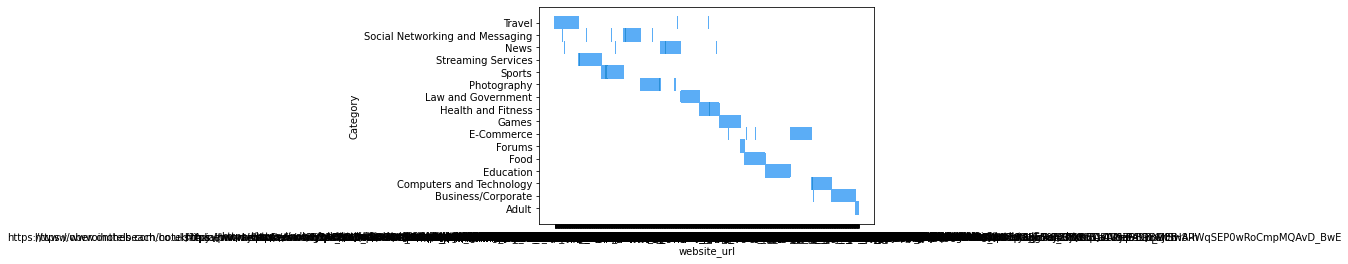

In [22]:
sns.histplot(x = data["website_url"],y = data["Category"])

In [ ]:
sns.histplot(x = data["cleaned_website_text"],y = data["Category"])
plt.show()

In [6]:
data["Category"].value_counts()

Education                          114
Business/Corporate                 109
Travel                             107
Streaming Services                 105
Sports                             104
E-Commerce                         102
Games                               98
News                                96
Health and Fitness                  96
Computers and Technology            93
Photography                         93
Food                                92
Law and Government                  84
Social Networking and Messaging     83
Forums                              16
Adult                               16
Name: Category, dtype: int64

In [7]:
data["Category"].unique()

array(['Travel', 'Social Networking and Messaging', 'News',
       'Streaming Services', 'Sports', 'Photography',
       'Law and Government', 'Health and Fitness', 'Games', 'E-Commerce',
       'Forums', 'Food', 'Education', 'Computers and Technology',
       'Business/Corporate', 'Adult'], dtype=object)

In [8]:
import nltk

In [9]:
from nltk.corpus import stopwords

In [10]:
from nltk.tokenize import word_tokenize

In [11]:
from nltk.tokenize import RegexpTokenizer

In [12]:
from nltk.stem import WordNetLemmatizer

In [13]:
from nltk.stem import PorterStemmer

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
import string

In [17]:
data["clean_text_punc"] = data["cleaned_website_text"].apply(lambda x : "". join([word for word in x if word not in string.punctuation]))

In [18]:
data.head(3)

,Unnamed: 0,website_url,cleaned_website_text,Category,clean_text_punc
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel,official site good hotel accommodation big sav...
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel,expedia hotel book sites like use vacation wor...
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel,tripadvisor hotel book sites like previously d...


In [19]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAMAKRISHNAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
stopword_master = stopwords.words("english")

In [21]:
data["clean_text_stop"] = data["clean_text_punc"].apply(lambda x : "". join([word for word in x if word not in stopword_master]))


In [22]:
stemmer = PorterStemmer()

In [23]:
data["clean_lower"] = data["clean_text_stop"].apply(lambda x : "". join([str(word.lower())for word in x.split()]))

In [24]:
data["clean_stem"] = data["clean_lower"].apply(lambda x : "". join([stemmer.stem(word) for word in x.split()]))

In [25]:
data.head(4)

,Unnamed: 0,website_url,cleaned_website_text,Category,clean_text_punc,clean_text_stop,clean_lower,clean_stem
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel,official site good hotel accommodation big sav...,ffcl e g hel ccn bg vng hel enn wrlwe brwe hel...,ffcleghelccnbgvnghelennwrlwebrwehelrevewfngurn...,ffcleghelccnbgvnghelennwrlwebrwehelrevewfngurn...
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel,expedia hotel book sites like use vacation wor...,expe hel bk e lke ue vcn wrk hr er lng rewr ...,expehelbkelkeuevcnwrkhrerlngrewrllebreknewcexp...,expehelbkelkeuevcnwrkhrerlngrewrllebreknewcexp...
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel,tripadvisor hotel book sites like previously d...,rpvr hel bk e lke prevul el prennl reurn br re...,rpvrhelbkelkeprevulelprennlreurnbrrevewrecener...,rpvrhelbkelkeprevulelprennlreurnbrrevewrecener...
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel,cheap flights search compare flights momondo f...,chep flgh erch cpre flgh n fn chep flgh n fn c...,chepflgherchcpreflghnfnchepflghnfncprefrerlner...,chepflgherchcpreflghnfnchepflghnfncprefrerlner...


In [26]:
vect = TfidfVectorizer(max_features=5000,max_df = .95,min_df = 4,ngram_range=(1,2))

In [27]:
vect.fit(data["cleaned_website_text"])

TfidfVectorizer(max_df=0.95, max_features=5000, min_df=4, ngram_range=(1, 2))

In [28]:
sparse = vect.transform(data["cleaned_website_text"])

In [29]:
sparse_pd = sparse.toarray()

In [30]:
final_data = pd.DataFrame(sparse_pd)

In [31]:
final_data.shape

(1408, 5000)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_x,test_x,train_y,test_y = train_test_split(final_data,data["Category"],test_size = 0.2,random_state=1212)

In [34]:
#Multinomial naive bayes
from sklearn.naive_bayes import MultinomialNB

In [35]:
mnb = MultinomialNB()

In [36]:
mnb.fit(train_x,train_y)

MultinomialNB()

In [37]:
pred_mnb = mnb.predict(test_x)

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(test_y,pred_mnb))

                                 precision    recall  f1-score   support

                          Adult       0.00      0.00      0.00         3
             Business/Corporate       0.80      0.77      0.78        26
       Computers and Technology       0.88      0.71      0.79        21
                     E-Commerce       0.90      0.90      0.90        21
                      Education       0.64      1.00      0.78        16
                           Food       0.85      0.94      0.89        18
                         Forums       0.00      0.00      0.00         5
                          Games       1.00      1.00      1.00        15
             Health and Fitness       0.95      0.86      0.90        22
             Law and Government       0.94      0.94      0.94        17
                           News       0.67      0.93      0.78        15
                    Photography       1.00      0.95      0.98        21
Social Networking and Messaging       0.82      0.

C:\Users\RAMAKRISHNAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [41]:
forest = RandomForestClassifier()

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
param_grid = {"criterion":["gini","entropy"],"max_depth":[8,10,12,14],"n_estimators":[50,75,100],"max_features":[2,3],"min_samples_split":[20,30,40]}

In [51]:
gsv = GridSearchCV(estimator=forest,param_grid = param_grid,cv = 5,n_jobs = -1,verbose = 3)

In [52]:
gsv.fit(train_x,train_y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.2min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 12, 14], 'max_features': [2, 3],
                         'min_samples_split': [20, 30, 40],
                         'n_estimators': [50, 75, 100]},
             verbose=3)

In [54]:
gsv.best_estimator_

RandomForestClassifier(max_depth=14, max_features=3, min_samples_split=30)

In [55]:
gsv.best_score_

0.7602084562438545

In [57]:
forest_model = RandomForestClassifier(max_depth=14, max_features=3, min_samples_split=30)

In [58]:
forest_model.fit(train_x,train_y)

RandomForestClassifier(max_depth=14, max_features=3, min_samples_split=30)

In [59]:
pred = forest_model.predict(test_x)

In [60]:
print(classification_report(test_y,pred))

                                 precision    recall  f1-score   support

                          Adult       0.00      0.00      0.00         3
             Business/Corporate       0.88      0.58      0.70        26
       Computers and Technology       0.75      0.14      0.24        21
                     E-Commerce       0.76      0.90      0.83        21
                      Education       0.33      0.94      0.48        16
                           Food       0.76      0.89      0.82        18
                         Forums       0.00      0.00      0.00         5
                          Games       0.45      0.67      0.54        15
             Health and Fitness       0.94      0.73      0.82        22
             Law and Government       1.00      0.94      0.97        17
                           News       0.64      0.93      0.76        15
                    Photography       0.93      0.67      0.78        21
Social Networking and Messaging       1.00      0.

C:\Users\RAMAKRISHNAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
param_grid = {"criterion":["gini","entropy"],"max_depth":[14,16,18],"n_estimators":[50,75,100],"max_features":[2,3],"min_samples_split":[30]}

In [62]:
sv = GridSearchCV(estimator=forest,param_grid = param_grid,cv = 5,n_jobs = -1,verbose = 3)

In [63]:
sv.fit(train_x,train_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   33.2s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [14, 16, 18], 'max_features': [2, 3],
                         'min_samples_split': [30],
                         'n_estimators': [50, 75, 100]},
             verbose=3)

In [64]:
sv.best_estimator_

RandomForestClassifier(max_depth=14, max_features=3, min_samples_split=30)

In [50]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression()

In [52]:
lr.fit(train_x,train_y)

LogisticRegression()

In [53]:
y_pred = lr.predict(test_x)

In [54]:
print(classification_report(test_y,y_pred))

                                 precision    recall  f1-score   support

                          Adult       1.00      0.33      0.50         3
             Business/Corporate       0.77      0.77      0.77        26
       Computers and Technology       0.71      0.71      0.71        21
                     E-Commerce       0.95      0.95      0.95        21
                      Education       0.64      1.00      0.78        16
                           Food       0.94      0.89      0.91        18
                         Forums       0.00      0.00      0.00         5
                          Games       1.00      1.00      1.00        15
             Health and Fitness       0.91      0.91      0.91        22
             Law and Government       0.94      0.88      0.91        17
                           News       0.74      0.93      0.82        15
                    Photography       0.91      0.95      0.93        21
Social Networking and Messaging       1.00      0.

C:\Users\RAMAKRISHNAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
abc = AdaBoostClassifier(base_estimator=lr , n_estimators=10)

In [63]:
abc.fit(train_x,train_y)

AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=10)

In [64]:
abc_pred = abc.predict(test_x)

In [65]:
print(classification_report(test_y,abc_pred))

                                 precision    recall  f1-score   support

                          Adult       0.00      0.00      0.00         3
             Business/Corporate       0.00      0.00      0.00        26
       Computers and Technology       0.00      0.00      0.00        21
                     E-Commerce       0.00      0.00      0.00        21
                      Education       0.06      1.00      0.11        16
                           Food       0.00      0.00      0.00        18
                         Forums       0.00      0.00      0.00         5
                          Games       0.00      0.00      0.00        15
             Health and Fitness       0.00      0.00      0.00        22
             Law and Government       0.00      0.00      0.00        17
                           News       0.00      0.00      0.00        15
                    Photography       0.00      0.00      0.00        21
Social Networking and Messaging       0.00      0.

C:\Users\RAMAKRISHNAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
#support vectormachines
from sklearn.svm import SVC

In [35]:
model = SVC()

In [36]:
param_grid = {"kernel":["sigmoid","linear","rbf"],"C":[0.01,0.1,1,10]}

In [39]:
gsv= GridSearchCV(estimator = model,param_grid = param_grid,cv = 5,verbose=3,n_jobs = -1)

In [40]:
gsv.fit(train_x,train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  6.2min finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'kernel': ['sigmoid', 'linear', 'rbf']},
             verbose=3)

In [41]:
gsv.best_estimator_

SVC(C=1, kernel='linear')

In [42]:
gsv.best_score_

0.91294395280236

In [43]:
sv_model = SVC(C=1, kernel='linear')

In [45]:
sv_model.fit(train_x,train_y)

SVC(C=1, kernel='linear')

In [46]:
pred_sv = sv_model.predict(test_x)

In [47]:
print(classification_report(test_y,pred_sv))

                                 precision    recall  f1-score   support

                          Adult       1.00      1.00      1.00         3
             Business/Corporate       0.72      0.81      0.76        26
       Computers and Technology       0.73      0.76      0.74        21
                     E-Commerce       1.00      0.90      0.95        21
                      Education       0.80      1.00      0.89        16
                           Food       0.95      1.00      0.97        18
                         Forums       0.75      0.60      0.67         5
                          Games       1.00      1.00      1.00        15
             Health and Fitness       0.95      0.91      0.93        22
             Law and Government       0.94      0.94      0.94        17
                           News       0.81      0.87      0.84        15
                    Photography       1.00      0.95      0.98        21
Social Networking and Messaging       0.92      0.

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(test_y,pred_sv)

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 21,  3,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  4, 16,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0, 19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  3,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 20,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0, 16,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0, 13,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  1,  0, 11,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,

In [70]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

In [71]:
tree_model = DecisionTreeClassifier()

In [72]:
param_grid = {"criterion":["gini","entropy"],"max_depth":[8,10,12,14],"min_samples_split":[20,30,40],"min_samples_leaf":[30,40,50]}

In [74]:
GSV = GridSearchCV(estimator = tree_model,param_grid = param_grid,cv=5,verbose = 3,n_jobs = -1)


In [75]:
GSV.fit(train_x,train_y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.8min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 12, 14],
                         'min_samples_leaf': [30, 40, 50],
                         'min_samples_split': [20, 30, 40]},
             verbose=3)

In [76]:
GSV.best_estimator_

DecisionTreeClassifier(max_depth=14, min_samples_leaf=30, min_samples_split=20)

In [77]:
GSV.best_score_

0.5612782694198624

In [78]:
tree = DecisionTreeClassifier(max_depth=14, min_samples_leaf=30, min_samples_split=20)


In [79]:
tree.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=30, min_samples_split=20)

In [84]:
pred_tree = tree.predict(test_x)

In [85]:
print(classification_report(test_y,pred_tree))

                                 precision    recall  f1-score   support

                          Adult       0.00      0.00      0.00         3
             Business/Corporate       0.20      0.62      0.30        26
       Computers and Technology       0.57      0.19      0.29        21
                     E-Commerce       0.71      0.57      0.63        21
                      Education       0.67      0.38      0.48        16
                           Food       0.82      0.50      0.62        18
                         Forums       0.00      0.00      0.00         5
                          Games       0.73      0.73      0.73        15
             Health and Fitness       0.73      0.50      0.59        22
             Law and Government       0.56      0.82      0.67        17
                           News       0.79      0.73      0.76        15
                    Photography       1.00      0.81      0.89        21
Social Networking and Messaging       1.00      0.

C:\Users\RAMAKRISHNAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
#k neighbors
from sklearn.neighbors import KNeighborsClassifier

In [113]:
kn_model = KNeighborsClassifier(n_neighbors=25)

In [114]:
kn_model.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=25)

In [115]:
pred_kn = kn_model.predict(test_x)

In [116]:
print(classification_report(test_y,pred_kn))

                                 precision    recall  f1-score   support

                          Adult       1.00      0.33      0.50         3
             Business/Corporate       0.95      0.81      0.88        26
       Computers and Technology       0.75      0.71      0.73        21
                     E-Commerce       0.91      0.95      0.93        21
                      Education       0.76      1.00      0.86        16
                           Food       0.89      0.94      0.92        18
                         Forums       1.00      0.20      0.33         5
                          Games       1.00      0.87      0.93        15
             Health and Fitness       0.95      0.82      0.88        22
             Law and Government       0.94      0.88      0.91        17
                           News       0.70      0.93      0.80        15
                    Photography       0.80      0.95      0.87        21
Social Networking and Messaging       0.85      0.

In [99]:
#voting classifier
from sklearn.ensemble import VotingClassifier

In [105]:
vc = VotingClassifier(estimators = [("lr",lr),("tr",tree_model),("fr",forest),("kn",kn_model)])

In [106]:
vc.fit(train_x,train_y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('tr', DecisionTreeClassifier()),
                             ('fr', RandomForestClassifier()),
                             ('kn', KNeighborsClassifier(n_neighbors=25))])

In [107]:
pred_vc = vc.predict(test_x)

In [108]:
print(classification_report(test_y,pred_vc))

                                 precision    recall  f1-score   support

                          Adult       1.00      0.67      0.80         3
             Business/Corporate       0.81      0.81      0.81        26
       Computers and Technology       0.79      0.71      0.75        21
                     E-Commerce       0.95      1.00      0.98        21
                      Education       0.73      1.00      0.84        16
                           Food       0.83      0.83      0.83        18
                         Forums       1.00      0.20      0.33         5
                          Games       0.93      0.93      0.93        15
             Health and Fitness       0.95      0.86      0.90        22
             Law and Government       0.88      0.88      0.88        17
                           News       0.75      0.80      0.77        15
                    Photography       0.77      0.95      0.85        21
Social Networking and Messaging       1.00      0.

In [42]:
!pip install gensim

In [43]:
#word embedding
from gensim.models import Word2Vec

C:\Users\RAMAKRISHNAN\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [44]:
data["cleaned_website_text_token"] = data["cleaned_website_text"].apply(lambda x :x.split(" "))

In [45]:
data["cleaned_website_text_token"].head()

0    [official, site, good, hotel, accommodation, b...
1    [expedia, hotel, book, sites, like, use, vacat...
2    [tripadvisor, hotel, book, sites, like, previo...
3    [cheap, flights, search, compare, flights, mom...
4    [bot, create, free, account, create, free, acc...
Name: cleaned_website_text_token, dtype: object

In [46]:
model = Word2Vec(sentences=data["cleaned_website_text_token"],vector_size=128,window=5,workers=4,min_count=1)

In [47]:
model.wv.get_vector("site")

array([-3.04118007e-01,  1.63060039e-01,  8.37332845e-01, -8.13773394e-01,
       -9.79733393e-02, -1.00029483e-01, -1.27537143e+00, -1.42973363e+00,
        7.57107258e-01, -1.06098664e+00,  1.33671495e-03, -2.98390001e-01,
       -4.01931554e-02, -2.57482052e+00,  6.50591910e-01,  1.92707396e+00,
       -8.73846635e-02, -4.07497793e-01,  1.32436633e-01, -6.69664621e-01,
        9.43028510e-01,  2.22226167e+00, -2.32302099e-01, -8.10471475e-01,
       -6.67875469e-01,  1.37421000e+00,  1.52101979e-01,  5.00965774e-01,
        1.82959437e-01, -7.26848722e-01, -9.32874620e-01, -3.34731638e-01,
       -7.28319705e-01, -7.48968244e-01, -8.02748322e-01,  1.21159446e+00,
        1.74924469e+00,  6.43678069e-01,  1.47212374e+00, -5.30848622e-01,
        5.21466970e-01,  4.67441529e-01,  1.10803950e+00, -5.89455843e-01,
        1.38130963e+00,  4.37885314e-01,  6.96604133e-01, -1.53482151e+00,
       -1.30501658e-01, -1.59816909e+00, -3.15339267e-01, -1.15160823e+00,
       -6.88417077e-01,  

In [48]:
def get_average_embeddings(sentence):
    split_sent = sentence.split(" ")
    sent_emb= []
    for word in split_sent:
        if word in model.wv.key_to_index.keys():
            sent_emb.append(model.wv.get_vector(word))
        if not sent_emb:
            return np.zeros(model.vector_size)
        else:
            return np.mean(sent_emb,axis = 0)

In [49]:
import numpy as np

In [50]:
sent_embd = data["cleaned_website_text"].apply(lambda x:get_average_embeddings(x))

In [51]:
y = data["Category"]

In [52]:
train_x,test_x,train_y,test_y = train_test_split(sent_embd,data["Category"],test_size = 0.2,random_state=1212)

In [53]:
train_x.head()

687    [-0.3975729, -0.9904502, 1.037165, -0.8911775,...
11     [0.14605382, -0.04849095, 0.11460381, -0.04996...
674    [0.20212822, 0.004021212, 0.2772715, -0.232204...
389    [-0.9332099, -0.9101695, 1.2935176, 0.10759538...
501    [-0.0068313065, 0.0849878, 0.049861528, -0.641...
Name: cleaned_website_text, dtype: object

In [54]:
train_y.head()

687                 Health and Fitness
11                              Travel
674                 Health and Fitness
389    Social Networking and Messaging
501                               News
Name: Category, dtype: object

In [55]:
sent_embd.sample(20)

1085    [0.009488959, -0.02514388, 0.023534482, -0.078...
1302    [-0.33890694, 0.106245674, 0.2855406, -1.53558...
659     [-0.33890694, 0.106245674, 0.2855406, -1.53558...
799     [0.16307248, -0.06014709, -0.01481978, -0.2566...
1151    [0.19710861, -0.17957535, 0.060749494, -0.3021...
9       [0.03816599, 0.20000824, 0.24400915, -0.252845...
433     [-0.3765472, -0.29769564, 0.88619155, -1.07287...
762     [-0.067756444, -0.03908255, 0.1054828, -0.1347...
1104    [-1.0169234, 0.53083366, 0.9268717, -0.3041664...
1001    [0.027246084, 0.0934391, 0.11399956, -0.841573...
1031    [-1.0169234, 0.53083366, 0.9268717, -0.3041664...
1108    [-0.054771036, 0.040721085, 0.02335798, -0.178...
1270    [0.0031282008, -0.0012948546, 0.0028810566, -0...
1219    [0.0058677155, -0.0031571903, 0.014938566, -0....
521     [0.055464923, -0.01695721, 0.047612313, -0.111...
914     [-0.33890694, 0.106245674, 0.2855406, -1.53558...
219     [0.037609763, -0.009855969, 0.034573175, -0.14...
630     [0.279

In [61]:
train_x[0]

array([ 0.06278988,  0.29181838,  0.6521499 , -0.32180253,  0.02264168,
       -0.3519604 , -0.78347725, -0.6979313 ,  0.25599012, -0.25175694,
        0.2856741 , -0.32531157, -0.26015553, -1.5552596 ,  0.5272875 ,
        1.0704004 , -0.3751046 , -0.23805746, -0.03389641, -0.24363537,
        0.87356013,  0.9958333 ,  0.08311918, -0.498211  ,  0.04331426,
        0.88714445, -0.04848563,  0.35579857,  0.03863275, -0.51167834,
       -0.66228104, -0.30390885, -0.2794759 , -0.20365167, -0.5229814 ,
        0.7332647 ,  1.2891887 ,  0.05505977,  0.8364264 , -0.47503322,
        0.21136373,  0.16994663,  0.505613  , -0.31788924,  0.6566354 ,
        0.06009548,  0.31700256, -0.8758507 , -0.4881885 , -0.75288785,
       -0.12682062, -0.6044602 , -0.31850842,  0.58377355, -0.35288352,
       -0.37721643,  0.33947486, -0.6324503 , -0.13416924,  0.10852017,
        0.5727902 , -0.40897655, -0.7931937 ,  0.21823297,  0.49939975,
       -0.41949975,  0.8043293 ,  0.02567273, -0.6916265 , -0.45

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
model = LogisticRegression()

In [64]:
model.fit(list(train_x),train_y)

C:\Users\RAMAKRISHNAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
len(train_x[0])

128

In [66]:
sent_embd_len = sent_embd.map(lambda x: len(x))

In [67]:
sent_embd_len.nunique()

1

In [70]:
y_pred_log = model.predict(list(test_x))
                          

In [72]:
print(classification_report(test_y,y_pred_log))

                                 precision    recall  f1-score   support

                          Adult       1.00      0.33      0.50         3
             Business/Corporate       0.17      0.04      0.06        26
       Computers and Technology       0.20      0.24      0.22        21
                     E-Commerce       0.50      0.19      0.28        21
                      Education       0.25      0.38      0.30        16
                           Food       0.45      0.50      0.47        18
                         Forums       0.00      0.00      0.00         5
                          Games       0.33      0.33      0.33        15
             Health and Fitness       0.35      0.27      0.31        22
             Law and Government       0.38      0.53      0.44        17
                           News       0.50      0.47      0.48        15
                    Photography       0.20      0.05      0.08        21
Social Networking and Messaging       0.40      0.

C:\Users\RAMAKRISHNAN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
